In [8]:
import pandas as pd
import numpy as np
import math
import datetime
from ipynb.fs.defs.functions import new_route
from ipynb.fs.defs.functions import get_row
from ipynb.fs.defs.functions import get_column
from ipynb.fs.defs.functions import best_index
from ipynb.fs.defs.functions import find_best_position
from ipynb.fs.defs.functions import cities_list
from ipynb.fs.defs.functions import getName

In [2]:
from ipynb.fs.defs.functions import random_schedule_day

table=pd.read_csv("../Dati/orari/route.csv", delimiter=";")
time_table=pd.read_csv("../Dati/orari/route_time.csv", delimiter=";")
dft = pd.read_csv("../Dati/distanze/corrected_times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)

In [4]:
random_schedule_day(dft, 6)

['Martignana di Po, Libertà, 64',
 'Soresina, Giacomo Matteotti, 6',
 'Agnadello, Marconi, 6',
 'San Bassano, Mons. Frosi',
 'Soncino, Dante Alighieri, 23',
 'Manerbio, INSURREZIONE NAZIONALE']

In [2]:
dft = pd.read_csv("../Dati/distanze/times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
fur1 = pd.read_csv("../Dati/turni_f/2-opt1_shifts.csv", delimiter=";", encoding = "ISO-8859-1")
fur2 = pd.read_csv("../Dati/turni_f/2-opt2_shifts.csv", delimiter=";", encoding = "ISO-8859-1")
week = ["lunedi", "martedi", "mercoledi", "giovedi", "venerdi"]
lista = []
for day in week:
    lista = lista + list(fur1[day].dropna())
week = ["martedi", "mercoledi", "giovedi"]
for day in week:
    lista = lista + list(fur2[day].dropna())

In [4]:
getName(dft, "Crema")

'Crema, Civerchi, 9'

In [47]:
import matplotlib.pyplot as plt
benchmark = pd.read_csv("../Dati/altro/benchmark.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
benchmark

,5,10,15,20,25,30,35
greedy,0.035,0.116,0.278,0.462,0.720,1.044,1.331
LS,0.307,1.084,2.296,4.331,6.534,10.365,13.418
2opt,0.665,5.265,17.679,36.888,74.975,134.065,171.945


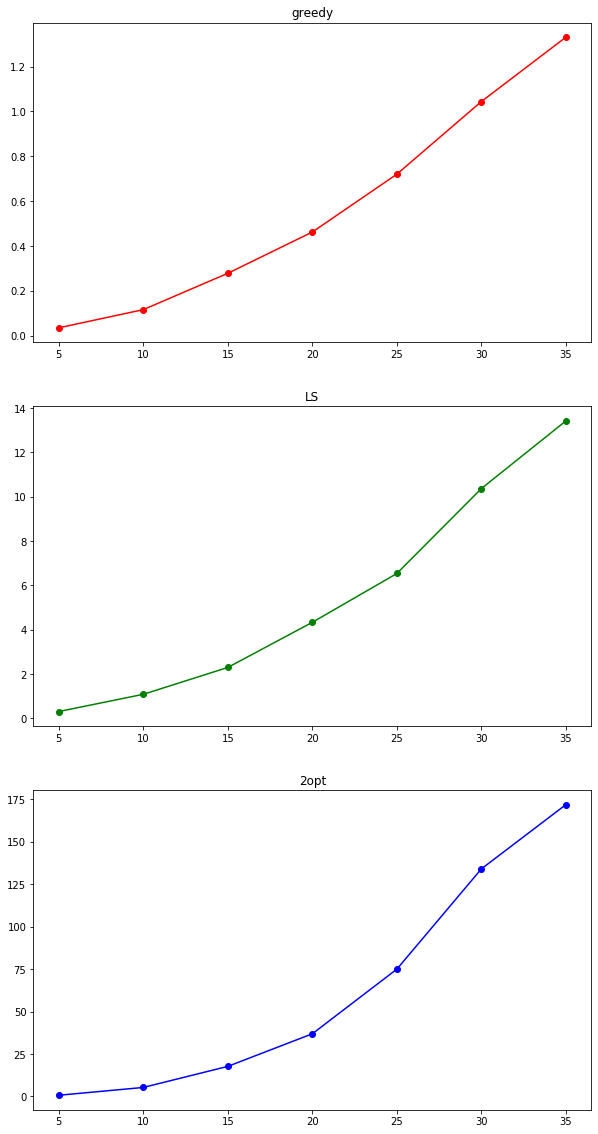

In [48]:
algs = ["greedy", "LS", "2opt"]
colors = ["r", "g", "b"]

plt.figure(figsize=[10,20])
for alg in algs:
#     if(algs.index(alg)<2):
#         plt.ylim([0,14])
    plt.subplot(3,1, algs.index(alg)+1)
    plt.title(alg)
    plt.plot(benchmark.loc[alg], colors[algs.index(alg)]+"o-")
plt.show()

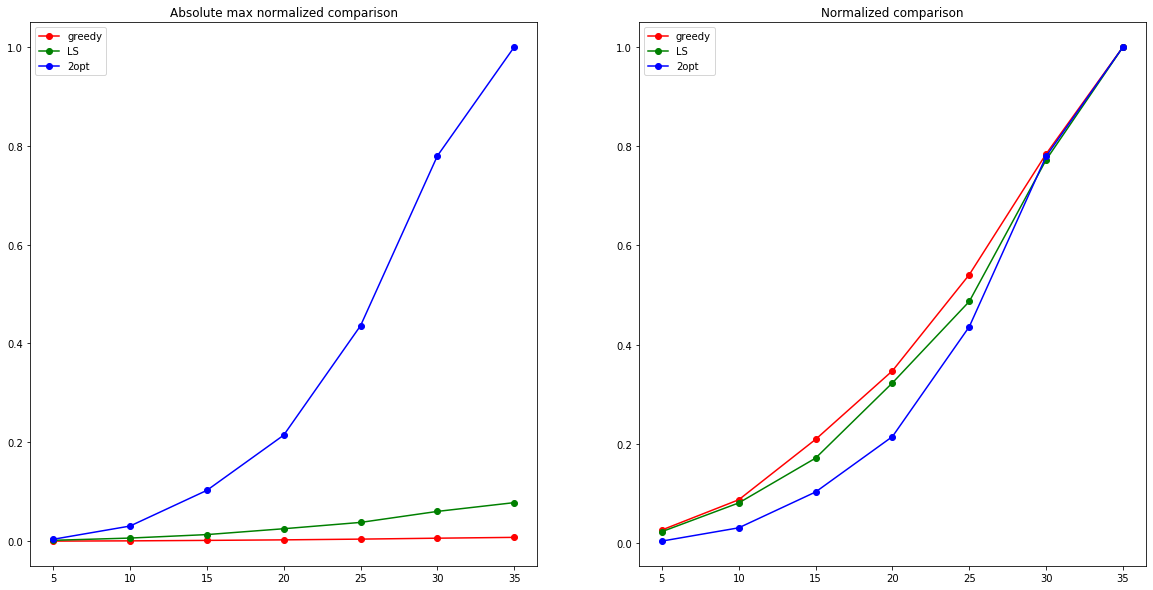

In [49]:
algs = ["greedy", "LS", "2opt"]
colors = ["r", "g", "b"]

plt.figure(figsize=[20,10])
plt.subplot(121)
for alg in algs:
#     if(algs.index(alg)<2):
#         plt.ylim([0,14])
    plt.plot(benchmark.columns,[x/max(benchmark.max()) for x in benchmark.loc[alg]], colors[algs.index(alg)]+"o-")
plt.title("Absolute max normalized comparison")
plt.legend(algs)

plt.subplot(122)
for alg in algs:
#     if(algs.index(alg)<2):
#         plt.ylim([0,14])
    plt.plot(benchmark.columns,[x/max(benchmark.loc[alg]) for x in benchmark.loc[alg]], colors[algs.index(alg)]+"o-")
plt.title("Normalized comparison")
plt.legend(algs)
plt.show()